In [ ]:
# How much is wind power at a particular location ?
# Station Name : OAK PARK 
# Wind speed is analysed by hourly basic 

C:\Users\sarab\AppData\Local\Temp\ipykernel_23440\2802378854.py:12: DtypeWarning: Columns (2,4,6,7,8,9,10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, skiprows=17)  # Skip the first 17 rows of metadata
C:\Users\sarab\AppData\Local\Temp\ipykernel_23440\2802378854.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_cleaned['date'] = pd.to_datetime(data_cleaned['date'], errors='coerce')
C:\Users\sarab\AppData\Local\Temp\ipykernel_23440\2802378854.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['date'] = pd.to_datetime(data_c

Missing values in dataset:
irain     0
rain      0
itemp     0
temp      0
iwetb     0
wetb      0
dewpt     0
vappr     0
rhum      0
msl       0
iwsdp     0
wdsp      0
iwddir    0
wddir     0
dtype: int64
Summary Statistics:
          irain           rain     itemp           temp     iwetb  \
count  184522.0  184522.000000  184522.0  184522.000000  184522.0   
mean        0.0       0.097116       0.0      10.145199       0.0   
std         0.0       0.426817       0.0       5.291204       0.0   
min         0.0       0.000000       0.0     -12.400000       0.0   
25%         0.0       0.000000       0.0       6.500000       0.0   
50%         0.0       0.000000       0.0      10.200000       0.0   
75%         0.0       0.000000       0.0      13.900000       0.0   
max         0.0      17.800000       0.0      31.200000       0.0   

                wetb          dewpt          vappr           rhum  \
count  184522.000000  184522.000000  184522.000000  184522.000000   
mean        

C:\Users\sarab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


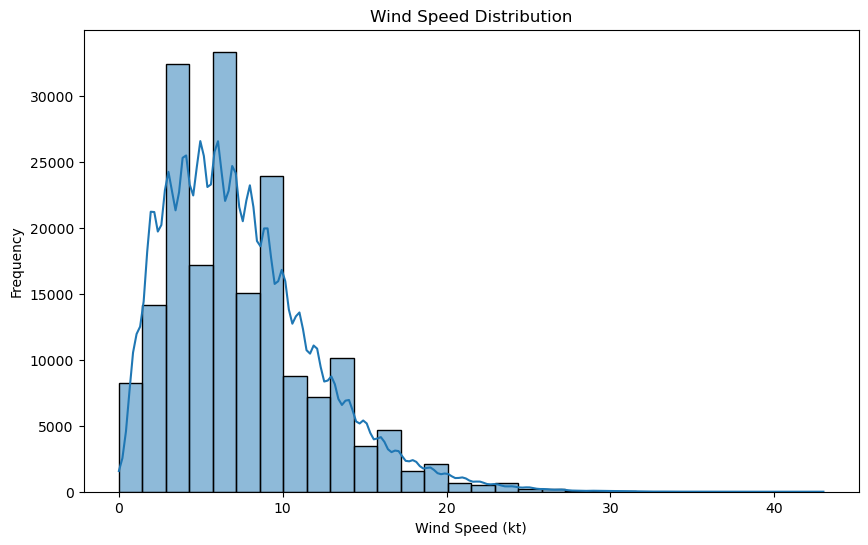

In [15]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt


#steps 

# load data 
# from file name 
file_path = 'C:/Users/sarab/Downloads/hly375/hly375/hly375.csv'
data = pd.read_csv(file_path, skiprows=17)  # Skip the first 17 rows of metadata

#print(data)


# Rename columns to match the dataset's ddescription 
data.columns = ['date', 'irain', 'rain', 'itemp', 'temp', 'iwetb', 'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'iwsdp', 'wdsp', 'iwddir', 'wddir']



# Apply column-wise filtering based on indicators
# Rainfall: Keep rows where irain is between 0 and 6, drop rain values where irain == -1
data.loc[data['irain'] == -1, 'rain'] = None


# Temperature: Drop temp values where itemp == 4
data.loc[data['itemp'] == 4, 'temp'] = None

# Wet Bulb: Drop wetb values where iwetb == 4
data.loc[data['iwetb'] == 4, 'wetb'] = None

# Wind Speed: Drop wdsp values where iwsdp == 7
data.loc[data['iwsdp'] == 7, 'wdsp'] = None

# Wind Direction: Drop wddir values where iwddir == 7
data.loc[data['iwddir'] == 7, 'wddir'] = None


# Drop rows with missing values in any critical columns
data_cleaned = data.dropna(subset=['rain', 'temp', 'wetb', 'wdsp', 'wddir'])

# Convert date column to datetime format
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'], errors='coerce')
data_cleaned = data_cleaned.dropna(subset=['date'])


# Set the 'date' column as the index for time series analysis
data_cleaned.set_index('date', inplace=True)



# Store valid data in a database
conn = sqlite3.connect("weather_data.db")
data_cleaned.to_sql("weather", conn, if_exists="replace", index=False)


# Step 1: Data Cleaning 
# Check for missing values
print("Missing values in dataset:")
print(data_cleaned.isnull().sum())



# Ensure all numerical columns are properly converted to numeric
data_cleaned[['rain', 'temp', 'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'wdsp']] = data_cleaned[['rain', 'temp', 'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'wdsp']].apply(pd.to_numeric, errors='coerce')
data_cleaned = data_cleaned.dropna()


# Step 2: Descriptive Statistics
# Summary statistics
print("Summary Statistics:")
print(data_cleaned.describe())

# Step 3: Data Visualization
# Plot wind speed distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['wdsp'], bins=30, kde=True)
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed (kt)')
plt.ylabel('Frequency')
plt.show()

# Close database connection
conn.close()






Plot - Analysis of the Wind Speed Distribution:

This histogram with a kernel density estimation (KDE) overlay provides insights into the frequency distribution of wind speeds (wdsp) in the dataset.

Skewed Distribution:

The wind speed distribution is right-skewed, meaning most values are concentrated at lower speeds, and there is a gradual decline as wind speed increases.

Dominant Range:

The majority of wind speeds are between 3 and 12 kt, with a peak around 6–7 kt, as indicated by the tallest bars.

Turbine Operational Range:

If the assumed wind turbine operational range is 3 to 25 kt, the bulk of the data lies within this range, making the location suitable for wind energy generation.
The long tail extending beyond 25 kt represents occasional high wind speeds, which might correspond to extreme weather events.
Extreme Wind Speeds:

Wind speeds above 20 kt are rare, indicating that extremely high winds are infrequent.

Key findings:

Wind Energy Potential:

The concentration of wind speeds in the range of 3 to 12 kt suggests that this region has consistent and moderate winds, which are generally favorable for wind turbines.

Turbine Suitability:

Since most wind speeds fall within the operational range of typical turbines (3–25 kt), the location is likely suitable for efficient energy generation.

Extreme Events:

The tail of the distribution shows some occurrences of wind speeds beyond 25 kt, which could indicate storms or extreme weather. These events may necessitate consideration for turbine design and maintenance.

In [ ]:
# Relation between key weather metrics - Air Temperature(temp), Wet Bulb Temperature(wetb), Dew Point Temperature(dewpt), 
# Relative Humidity(rhum), Mean Wind Speed(wdsp), Precipitation Amount(rain)

C:\Users\sarab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

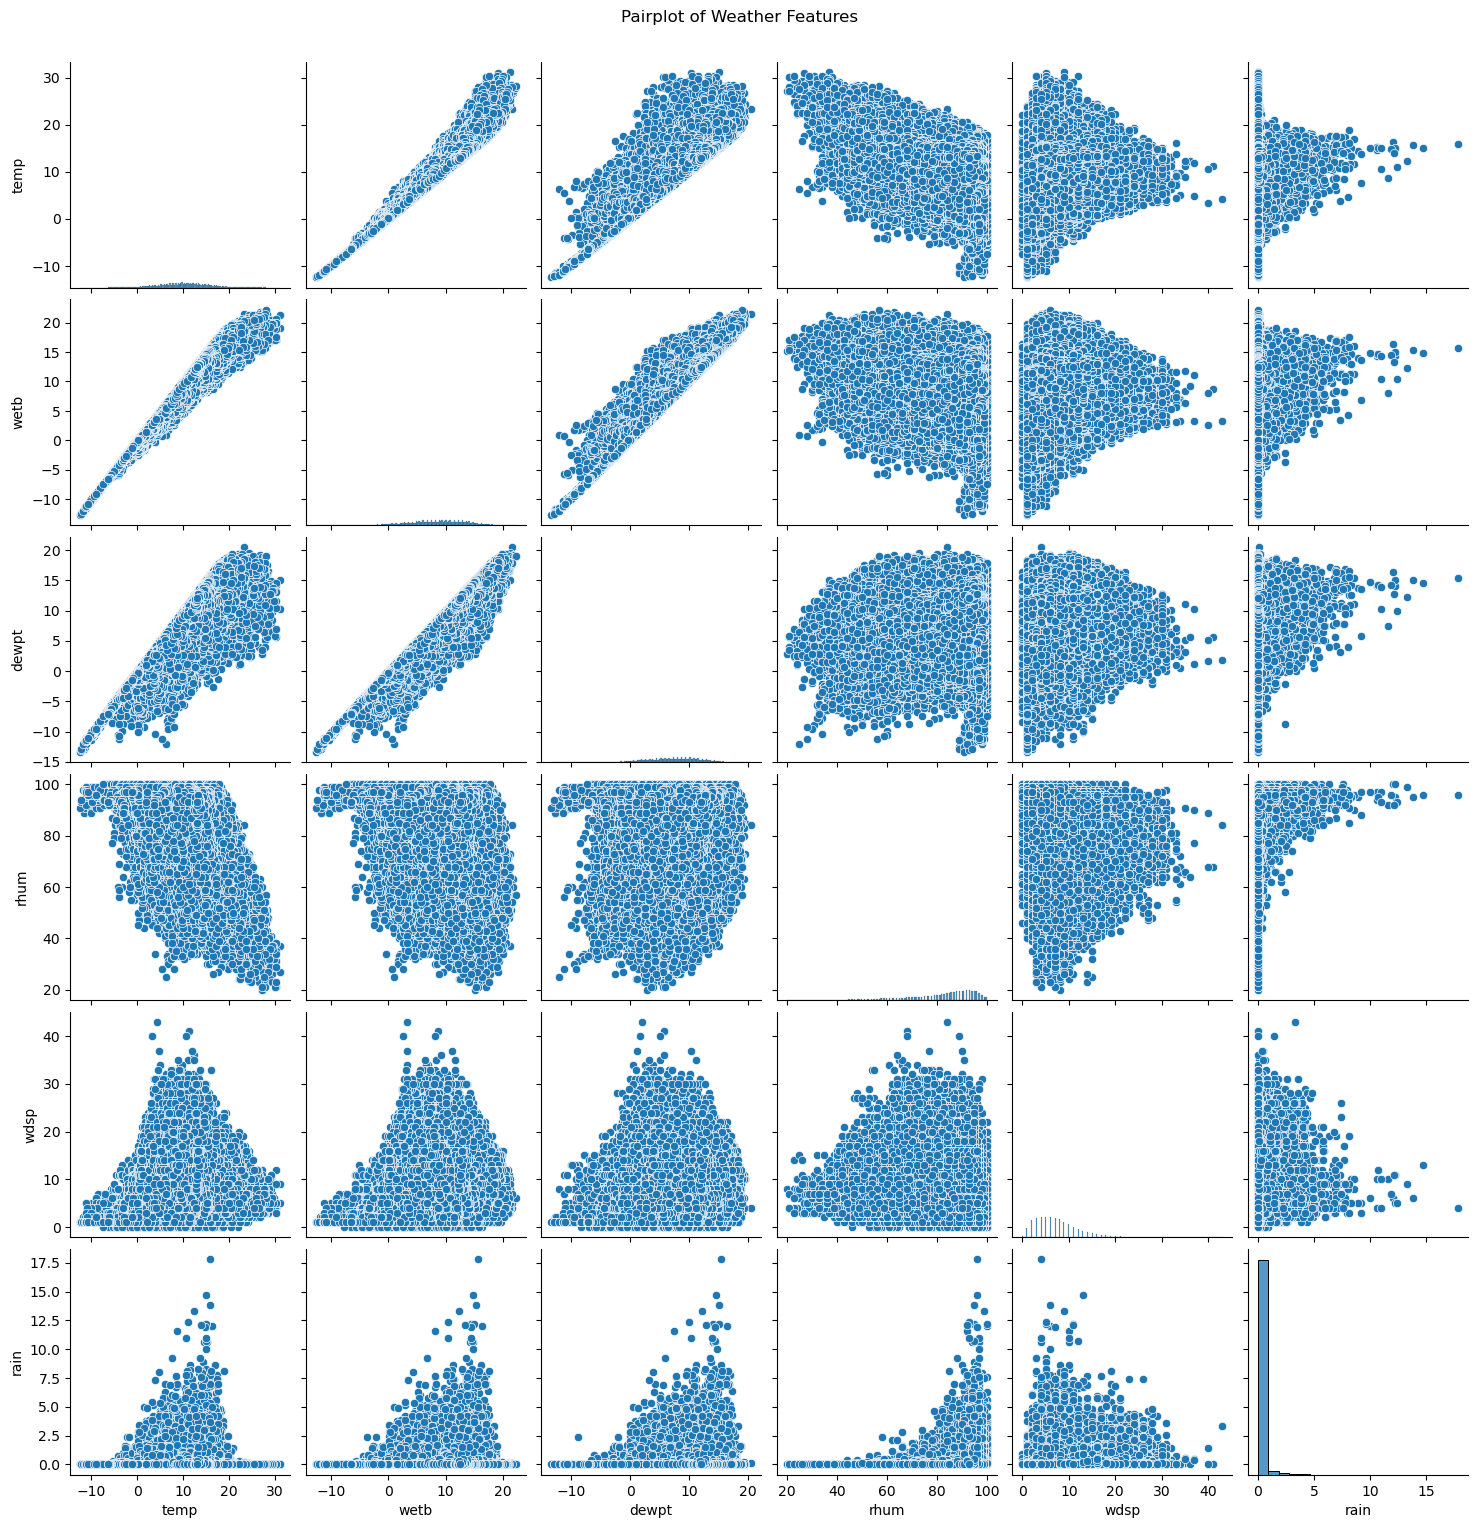

In [14]:
# Pairplot of key variables
sns.pairplot(data_cleaned[['temp', 'wetb', 'dewpt', 'rhum', 'wdsp','rain']])
plt.suptitle('Pairplot of Weather Features', y=1.02)
plt.show()

In [ ]:
I) Diagonal Plots (Histograms):

(1) rain (Rainfall): The histogram indicates a right-skewed distribution, with most rainfall values concentrated around lower values.

(2) temp (Temperature): Temperature shows a broader, more uniform distribution, suggesting significant seasonal variation.

(3) wetb (Wet Bulb Temperature): The wet bulb temperature distribution appears narrower and centered, with fewer extremes compared to temp.

(4) wdsp (Wind Speed): Wind speed values are mostly concentrated within a lower range, with some outliers at higher speeds.

II) Off-Diagonal Scatter Plots (Relationships):

(1) temp vs. dewpt (Temperature vs. Dew Point Temperature): A strong positive linear relationship is visible.

(2) temp vs. rhum (Temperature vs. Relative Humidity): An inverse relationship is evident: as temperature increases, relative humidity tends to decrease.

(3) rain vs. wdsp (Rainfall vs. Wind Speed): A weak or no significant correlation is visible. Rainfall does not seem to be strongly influenced by wind speed in this dataset.

(4) wdsp vs. rhum (Wind Speed vs. Relative Humidity): Scatter points are widely dispersed, indicating no direct relationship between wind speed and relative humidity.

III)
 Key Relationships: (1) Positive Correlations: temp and dewpt: Strong linear correlation. dewpt and rhum: Indirectly related through temperature dynamics.

(2) Weak or No Correlations: rain with temp, wdsp, and other variables: Rainfall seems largely independent in this dataset. wdsp with other variables: Wind speed shows weak or no correlation with the other weather metrics.

(3) Inverse Relationships: temp and rhum: Indicates the atmospheric trend where warm air reduces relative humidity.

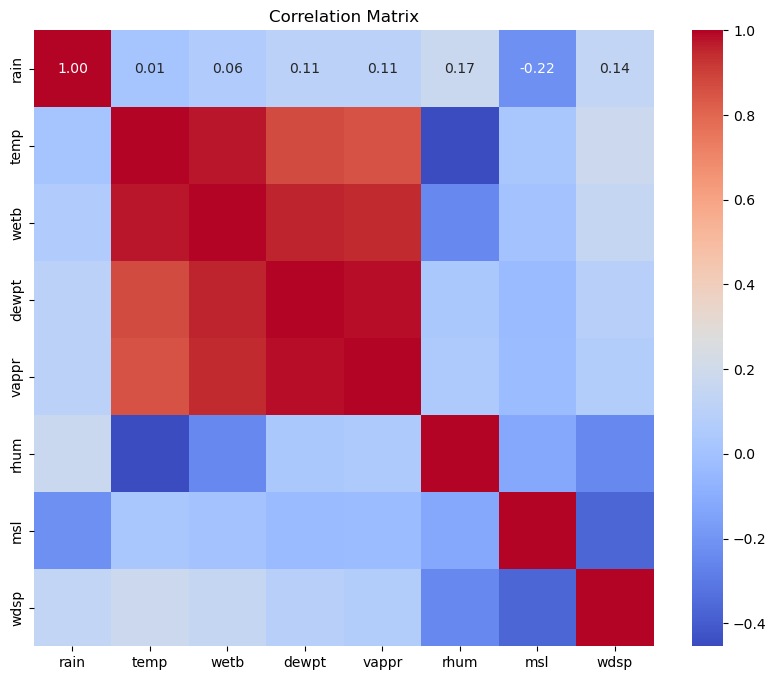

In [16]:
# Correlation matrix
correlation_matrix = data_cleaned[['rain', 'temp', 'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'wdsp']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

1) Strong Positive Correlations:
   
 temp (Temperature) and dewpt (Dew Point Temperature):
 Correlation: ~0.97
 A very strong positive relationship.

 rhum (Relative Humidity) and dewpt:
 Correlation: ~0.84
 High relative humidity corresponds to higher dew point values.

 rhum and vappr (Vapor Pressure):
 Correlation: ~0.87
 Vapor pressure is strongly tied to humidity, reflecting the amount of moisture in the air.

2) Moderate Negative Correlations:
   
 rhum and temp:
 Correlation: ~-0.45
 As temperature increases, relative humidity decreases. This is a common atmospheric trend, as warm air can hold more moisture, reducing   relative humidity.

 msl (Mean Sea Level Pressure) and rain:
 Correlation: ~-0.22
 A weak negative relationship indicates that higher sea-level pressures might be associated with less rainfall.

3) Weak or No Correlation:
   
 rain and wdsp (Wind Speed):
 Correlation: ~0.14
 No significant relationship between rainfall and wind speed, as they are likely influenced by different weather conditions.

 rain and temp:
 Correlation: ~0.01
 Rainfall and temperature do not appear to be directly related in this dataset.

 wdsp (Wind Speed) and Most Variables:
 Correlations with other variables are close to zero, indicating little to no direct linear relationship